# Load SH insolation
Ref: Laskar et al., 2004

In [ ]:
# read the insolation data '65N_inso_mean90_-1Ma_0_inter100.txt'
import pandas as pd
path='D:/VScode/Last_deglaciation/data/inso60S_1Ma_0_inter100_meanlongitude_270.txt'
inso60s=pd.read_csv(path, sep='\s+', header=None)
# rename columns
inso60s.columns=['age', 'insolation']
# age*-1000
inso60s['age']=-1*inso60s['age']*1000
# filp the dataframe
inso60s=inso60s.iloc[::-1]
# convert inso60s to csv
# save the data to csv under /data_fig3
inso60s.to_csv('D:/VScode/Last_deglaciation/data_fig3/inso60s.csv', index=False)

inso60s

,age,insolation
0,-0.0,511.037082
1,100.0,511.404930
2,200.0,511.758942
3,300.0,512.098589
4,400.0,512.423324
...,...,...
9996,999600.0,464.574426
9997,999700.0,464.304934
9998,999800.0,464.063080
9999,999900.0,463.848860


# Load intergrated summer insolation data
Ref: Huybers et al., 2006

In [ ]:
path='D:/VScode/Last_deglaciation/data_fig3/'

# read Huybers P &Denton-2008-NGeo-65S.txt
import pandas as pd
# df_inter_ann = pd.read_csv(path + 'Huybers_Denton_2008_NGeo_65S.txt', sep='\s+', header=0,skiprows=8)
df_inter_ann = pd.read_csv(path + 'j_60south.txt', sep='\s+', header=0,skiprows=8)
# rename column NaN to age
df_inter_ann.rename(columns={'NaN':'age'}, inplace=True)
# age culumn to ka
df_inter_ann['age']=df_inter_ann['age']*1000
# save the data to csv under /data_fig3
df_inter_ann.to_csv(path+'df_inter_ann.csv', index=False)

df_inter_ann


,age,0,25,50,75,100,125,150,175,200,...,375,400,425,450,475,500,525,550,575,600
0,0,7.439,7.394,7.236,7.096,6.946,6.785,6.610,6.418,6.214,...,4.222,3.817,3.360,2.827,2.167,1.184,0.0,0.0,0.0,0.0
1,1000,7.446,7.396,7.244,7.105,6.957,6.796,6.622,6.433,6.229,...,4.252,3.854,3.404,2.879,2.231,1.311,0.0,0.0,0.0,0.0
2,2000,7.454,7.400,7.253,7.116,6.969,6.809,6.636,6.446,6.244,...,4.273,3.871,3.425,2.903,2.264,1.352,0.0,0.0,0.0,0.0
3,3000,7.461,7.404,7.261,7.126,6.981,6.822,6.648,6.462,6.256,...,4.278,3.879,3.427,2.901,2.253,1.325,0.0,0.0,0.0,0.0
4,4000,7.468,7.410,7.271,7.137,6.993,6.834,6.661,6.475,6.271,...,4.274,3.872,3.409,2.872,2.204,1.259,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4996000,7.395,7.395,7.190,7.039,6.881,6.712,6.529,6.332,6.120,...,4.067,3.652,3.174,2.611,1.874,0.542,0.0,0.0,0.0,0.0
4997,4997000,7.392,7.392,7.184,7.032,6.872,6.703,6.520,6.323,6.113,...,4.088,3.676,3.212,2.664,1.968,0.823,0.0,0.0,0.0,0.0
4998,4998000,7.389,7.389,7.180,7.027,6.867,6.697,6.515,6.318,6.108,...,4.099,3.693,3.237,2.700,2.020,0.956,0.0,0.0,0.0,0.0
4999,4999000,7.388,7.388,7.178,7.025,6.865,6.695,6.512,6.316,6.107,...,4.103,3.701,3.245,2.712,2.044,1.005,0.0,0.0,0.0,0.0


# Load LGMR sat data
Ref: Osman et al., 2021

In [69]:
import xarray as xr
import numpy as np
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')

weight = np.cos(np.deg2rad(ds_sat['lat']))
weight = xr.where(weight < 0, 0, weight)

ds_sat['weight']=weight

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


# Get the T at 60°S

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


11.677394449710846

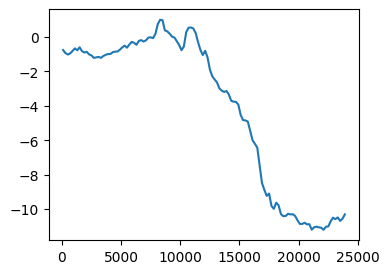

In [61]:
import xarray as xr

selected_data_at_60s = ds_sat.sel(lat=-60, method="nearest")

LGMR_sat_60s = selected_data_at_60s['sat'].mean(dim='lon')

import matplotlib.pyplot as plt

# Plotting the mean SAT time series at latitude -60 degrees
plt.figure(figsize=(4, 3))  # Set the figure size
plt.plot(LGMR_sat_60s['age'], LGMR_sat_60s, label='Mean SAT at -60°')

sat_at_21000 = LGMR_sat_60s.sel(age=21000, method='nearest').item()
sat_at_11000 = LGMR_sat_60s.sel(age=11000, method='nearest').item()

# Calculate the difference: later (11000) - former (21000)
difference = sat_at_11000 - sat_at_21000
difference


# Extract the data between 50 to 70°S, and calculate the weighted average

In [62]:
import xarray as xr
from toolbox import change_point_functions as cpf

ds_sat = cpf.cal_anomalies(ds_sat, years=2000)
ds_sat_subset = ds_sat.sel(lat=slice(-70, -50))

weights_broadcasted = ds_sat_subset['weight'].broadcast_like(ds_sat_subset['sat'])
sum_weighted_sat = (ds_sat_subset['sat_anomalies'] * weights_broadcasted).sum(dim=['lat', 'lon'])
sum_weight_sat = weights_broadcasted.sum(dim=['lat', 'lon'])

weighted_avg_sat_mean = sum_weighted_sat / sum_weight_sat

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


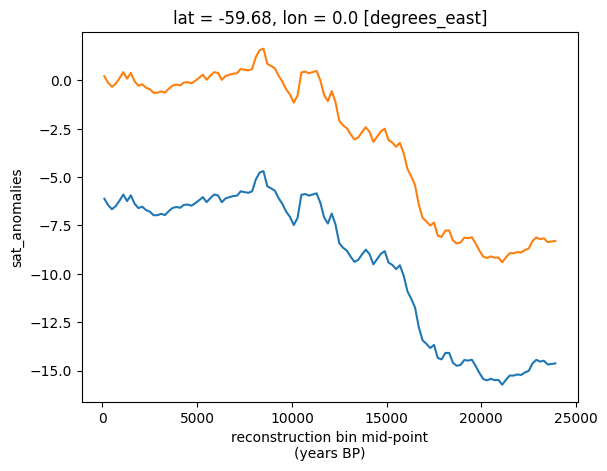

In [63]:
from matplotlib import pyplot as plt

ds_sat['sat'].sel(lat=-60, lon=0,method='nearest').plot()
ds_sat['sat_anomalies'].sel(lat=-60, lon=0,method='nearest').plot()


# Do the same for the ensamble LGMR data

In [72]:
# read the processed netcdf file
import xarray as xr
import numpy as np
from toolbox import change_point_functions as cpf

ds_sat_ens =  xr.open_dataset('data/LGMR_SAT_ens.nc') #xr.open_dataset('ens_ana_data/LGMR_SAT_ens_processed.nc')

weight = np.cos(np.deg2rad(ds_sat_ens['lat']))
# set weight to 0 if it is smaller than 0
weight = xr.where(weight < 0, 0, weight)

ds_sat_ens['weight']=weight

weighted_avg_sat_ens=[]
    
for i in range(len(ds_sat_ens['nEns'])):
    # Select the ensemble member
    ds_sat_i = ds_sat_ens.isel(nEns=i)
    ds_sat_i = cpf.cal_anomalies(ds_sat_i, years=2000)
    ds_sat_subset = ds_sat_i.sel(lat=slice(-70, -50))

    weights_broadcasted = ds_sat_subset['weight'].broadcast_like(ds_sat_subset['sat'])
    sum_weighted_sat = (ds_sat_subset['sat_anomalies'] * weights_broadcasted).sum(dim=['lat', 'lon'])
    sum_weight_sat = weights_broadcasted.sum(dim=['lat', 'lon'])

    weighted_avg_sat = sum_weighted_sat / sum_weight_sat
    weighted_avg_sat_ens.append(weighted_avg_sat.values)
    # if i==10:
    #     break


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarr

In [73]:
# preserve the weighted_avg_sat_mean using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_mean.pickle', 'wb') as f:
    pickle.dump(weighted_avg_sat_mean, f)

# preserve the weighted_avg_sat_ens using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_ens.pickle', 'wb') as f:
    pickle.dump(weighted_avg_sat_ens, f)

# Read LGMR SIC data
Ref: New data from M. Osman

In [79]:
path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'

# read the nc file from the path
import xarray as xr
import numpy as np

ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=10000, drop=True)

# Calculate the weight based on latitude
weight = np.cos(np.deg2rad(ds_seaice['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_seaice['weight'] = weight


ds_seaice

shape of the weight: (96,)


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (dims: 5, age: 70, lat: 96, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 1.01e+04 1.03e+04 1.05e+04 ... 2.37e+04 2.39e+04
  * dims     (dims) object 'mean              ' ... '97.5percentile    '
Data variables:
    sic      (dims, age, lat, lon) float32 0.0 0.0 0.0 ... 0.9979 0.9979 0.9979
    weight   (lat) float32 0.0 0.03306 0.06609 0.09905 ... 0.06609 0.03306 0.0

# Clculate the sea ice area of the LGMR

In [80]:
import xarray as xr


ds_seaice_subset = ds_seaice.sel(lat=slice(-90, 0))


import numpy as np

# Constants
R = 6371  # Earth's radius in km
delta_theta= 2.5/180*np.pi # 2.5 degree in radians

# Convert latitude values to radians
lat_radians = np.radians(ds_seaice_subset['lat'].values)
print('shape of lat_radians:', lat_radians.shape)
# Compute latitudinal boundaries
lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2
print('shape of lat_boundaries:', lat_boundaries.shape)

A=R**2*delta_theta*(np.sin(lat_boundaries[1:])-np.sin(lat_boundaries[:-1]))# area of each grid, Ref: https://www.johndcook.com/blog/2023/02/21/sphere-grid-area/#:~:text=Area%20of%20latitude%2Flongitude%20grid&text=A%20%3D%20%CF%80%20R%C2%B2%20(sin%20%CF%86,1%20%E2%88%92%20%CE%B82)%2F180.
print('shape of A:', A.shape)

A_center_lats=ds_seaice_subset['lat'].values[1:-1]
print('shape of A_center_lats:', A_center_lats.shape)

# remove the data corresponds to the last and firs lat in ds_seaice_subset
ds_seaice_subset_reduced=ds_seaice_subset.isel(lat=slice(1,-1))


# Step 1: Create an xarray DataArray for A with the dimension 'lat' and values of 'A_center_lats'
A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

# Step 2: Multiply sic data at dim=0 with A
# Selecting the mean sea ice concentration (sic at dim=0)
sic_mean = ds_seaice_subset_reduced['sic'][0, :, :]

# Multiplying sic with A
sic_area = sic_mean * A_xr

# Step 3: Sum up the resulting product over the latitude (and longitude, if needed)
LGMR_sic_area = sic_area.sum(dim=["lat", "lon"]).values/1e6

# add age to LGMR_sic_area so it got two columns
LGMR_sic_area=np.column_stack((ds_seaice_subset_reduced['age'].values,LGMR_sic_area))

# save the LGMR_sic_area using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/LGMR_sic_area.pickle', 'wb') as f:
    pickle.dump(LGMR_sic_area, f)

# LGMR_sic_area


shape of lat_radians: (48,)
shape of lat_boundaries: (47,)
shape of A: (46,)
shape of A_center_lats: (46,)


Text(0, 0.5, 'Sea ice area (10^6 km^2)')

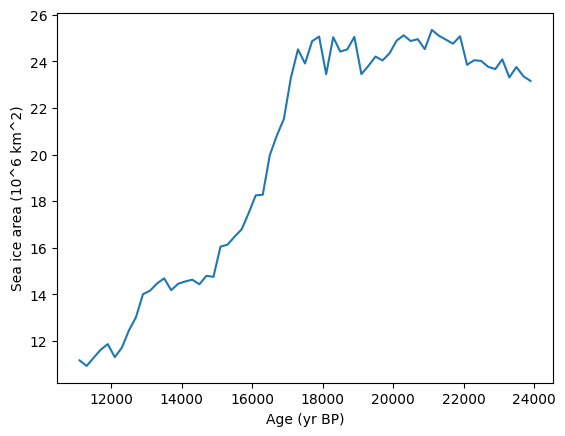

In [5]:
#plot total_sic_area
import matplotlib.pyplot as plt
plt.plot(LGMR_sic_area[:,0],LGMR_sic_area[:,1]) 
plt.xlabel('Age (yr BP)')
plt.ylabel('Sea ice area (10^6 km^2)') 

# Read orbital parameters
Ref: Laskar et al., 2004

In [6]:
# Read the ecc_0_500kyr_inter100.txt under /data_fig3

import pandas as pd

path='D:/VScode/Last_deglaciation/data_fig3/'
df_ecc=pd.read_csv(path+'ecc_0_500kyr_inter100.txt', sep='\s+', header=None)
df_ecc.columns=['age', 'ecc']
df_ecc['age']=-1*df_ecc['age']*1000
df_ecc=df_ecc.iloc[::-1]
df_ecc.to_csv(path+'df_ecc.csv', index=False)

df_ecc

,age,ecc
5000,-0.0,0.016702
4999,100.0,0.016750
4998,200.0,0.016797
4997,300.0,0.016845
4996,400.0,0.016892
...,...,...
4,499600.0,0.033901
3,499700.0,0.033871
2,499800.0,0.033841
1,499900.0,0.033812


In [11]:
import pandas as pd

path='D:/VScode/Last_deglaciation/data_fig3/'
df_obl=pd.read_csv(path+'obliquity_0_500kyr_inter100.txt', sep='\s+', header=None)
df_obl.columns=['age', 'obl']
df_obl['age']=-1*df_obl['age']*1000
df_obl=df_obl.iloc[::-1]
df_obl.to_csv(path+'df_obl.csv', index=False)
df_obl

,age,obl
5000,-0.0,0.409093
4999,100.0,0.409320
4998,200.0,0.409547
4997,300.0,0.409773
4996,400.0,0.410000
...,...,...
4,499600.0,0.414205
3,499700.0,0.414106
2,499800.0,0.414005
1,499900.0,0.413902


In [10]:
# Read the pre_0_500kyr_inter100.txt under /data_fig3

import pandas as pd

path='D:/VScode/Last_deglaciation/data_fig3/'
df_pre=pd.read_csv(path+'pre_0_500kyr_inter100.txt', sep='\s+', header=None)
df_pre.columns=['age', 'pre']
df_pre['age']=-1*df_pre['age']*1000
df_pre=df_pre.iloc[::-1]
df_pre.to_csv(path+'df_pre.csv', index=False)

df_pre

,age,pre
5000,-0.0,0.016280
4999,100.0,0.016431
4998,200.0,0.016568
4997,300.0,0.016690
4996,400.0,0.016798
...,...,...
4,499600.0,0.012835
3,499700.0,0.011893
2,499800.0,0.010943
1,499900.0,0.009986


# Read EBM data

In [64]:
# read the /data_fig3/EMB_results.xlsx
import pandas as pd
path='D:/VScode/Last_deglaciation/EBM_data/'
filename='EBM_results_shorten_Jan31.xlsx'

df_full_orbital_EBM=pd.read_excel(path+filename, sheet_name='Full-orbital')
# the first column*1000
df_full_orbital_EBM['age']=df_full_orbital_EBM['age']*1000
# save the df_full_orbital to csv
df_full_orbital_EBM.to_csv(path+'df_full_orbital_EBM.csv', index=False)
df_full_orbital_EBM.head()

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,427.336750,5.564279,-1.029714,23.891422,NaN,NaN
1,11000,428.465963,5.557092,-1.058631,24.010389,NaN,NaN
2,12000,430.701655,5.551410,-1.096506,24.172172,NaN,NaN
3,13000,433.812557,5.542759,-1.128241,24.309235,NaN,NaN
4,14000,437.481913,5.532736,-1.161961,24.439776,NaN,NaN


In [7]:
import pandas as pd

df_obl_EBM=pd.read_excel(path+filename, sheet_name='Obl only')
# the first column*1000
df_obl_EBM['age']=df_obl_EBM['age']*1000
# save the df_obl to csv
df_obl_EBM.to_csv(path+'df_obl_EBM.csv', index=False)

df_obl_EBM.head()


,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,463.423124,5.604459,-0.925008,23.509560,NaN,NaN
1,11000,463.181351,5.601785,-0.937702,23.557459,NaN,NaN
2,12000,462.676038,5.596196,-0.954712,23.627859,NaN,NaN
3,13000,461.929575,5.585563,-0.978717,23.711195,NaN,NaN
4,14000,460.953519,5.572391,-1.014674,23.831427,NaN,NaN


In [8]:
import pandas as pd
df_pre_EBM=pd.read_excel(path+filename, sheet_name='Pre only')
# the first column*1000
df_pre_EBM['age']=df_pre_EBM['age']*1000
# save the df_pre to csv
df_pre_EBM.to_csv(path+'df_pre_EBM.csv', index=False)

df_pre_EBM.head()

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,416.618614,5.403442,-1.521472,25.668195,NaN,NaN
1,11000,417.919917,5.398930,-1.541726,25.764954,NaN,NaN
2,12000,420.535264,5.401208,-1.552348,25.818325,NaN,NaN
3,13000,424.230549,5.400803,-1.549264,25.821833,NaN,NaN
4,14000,428.699372,5.406304,-1.537670,25.788731,NaN,NaN


In [9]:
import pandas as pd

df_GHG_EBM=pd.read_excel(path+filename, sheet_name='GHG')
# the first column*1000
df_GHG_EBM['age']=df_GHG_EBM['age']*1000
# save the df_pre to csv
df_GHG_EBM.to_csv(path+'df_GHG_EBM.csv', index=False)

df_GHG_EBM.head()

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,427.336750,5.564279,2.548542,11.794610,NaN,NaN
1,11000,428.465963,5.557092,2.655429,11.442139,NaN,NaN
2,12000,430.701655,5.551410,1.846439,14.263134,NaN,NaN
3,13000,433.812557,5.542759,1.749034,14.615075,NaN,NaN
4,14000,437.481913,5.532736,1.649764,14.990463,NaN,NaN


In [65]:
import pandas as pd

df_all_forcing_EBM=pd.read_excel(path+filename, sheet_name='All Forcing')
# the first column*1000
df_all_forcing_EBM['age']=df_all_forcing_EBM['age']*1000
# save the df_pre to csv
df_all_forcing_EBM.to_csv(path+'df_all_forcing_EBM.csv', index=False)

df_all_forcing_EBM.head()

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH),ice_asy,summer_duration
0,10000,427.336750,5.564279,2.517873,11.903615,NaN,NaN
1,11000,428.465963,5.557092,2.454374,12.136794,NaN,NaN
2,12000,430.701655,5.551410,1.476181,15.510074,NaN,NaN
3,13000,433.812557,5.542759,1.187269,16.530932,NaN,NaN
4,14000,437.481913,5.532736,0.899832,17.528899,NaN,NaN


# Load TraCE data
Ref He et al., 2011

In [1]:
import xarray as xr

path='D:/VScode/Last_deglaciation/TraCE_data/'
trace_orb = xr.open_dataset(path + 'b30.00_4kaDVTj.cam2.ncrcat.ann.nc')
trace_allforcing_sat = xr.open_dataset(path+'trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')
trace_allforcing_sic=xr.open_dataset(path+'trace.01-36.22000BP.cam2.ICEFRAC.22000BP_decavg_400BCE.nc')


trace_orb = trace_orb.rename({'TREFHT': 'sat'})
trace_orb = trace_orb.rename({'time': 'age'})
trace_orb['age'] = trace_orb['age'] * -1000
trace_orb['sat'] = trace_orb['sat'] - 273.15 # convert to Celsius

trace_orb_sat = trace_orb[['sat']]
trace_orb_sic = trace_orb[['ICEFRAC']]


trace_allforcing_sat = trace_allforcing_sat.rename({'TREFHT': 'sat'})
trace_allforcing_sat = trace_allforcing_sat.rename({'time': 'age'})
trace_allforcing_sat['age'] = trace_allforcing_sat['age'] * -1000
trace_allforcing_sat['sat'] = trace_allforcing_sat['sat'] - 273.15
trace_allforcing_sat = trace_allforcing_sat[['sat']]


trace_allforcing_sic = trace_allforcing_sic.rename({'time': 'age'})
trace_allforcing_sic['age'] = trace_allforcing_sic['age'] * -1000
trace_allforcing_sic = trace_allforcing_sic[['ICEFRAC']]


6.774467945098877

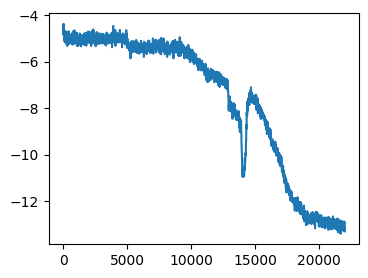

In [27]:
import xarray as xr

selected_data_at_60s = trace_allforcing_sat.sel(lat=-60, method="nearest")

trace_sat_60s = selected_data_at_60s['sat'].mean(dim='lon')

import matplotlib.pyplot as plt

# Plotting the mean SAT time series at latitude -60 degrees
plt.figure(figsize=(4, 3))  # Set the figure size
plt.plot(trace_sat_60s['age'], trace_sat_60s, label='Mean SAT at -60°')

sat_at_21000 = trace_sat_60s.sel(age=21000, method='nearest').item()
sat_at_11000 = trace_sat_60s.sel(age=11000, method='nearest').item()

# Calculate the difference: later (11000) - former (21000)
difference = sat_at_11000 - sat_at_21000
difference

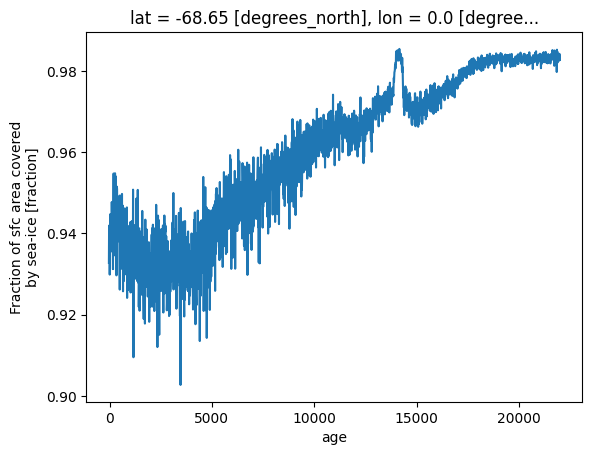

In [7]:
import matplotlib.pyplot as plt

# Selecting the ICEFRAC data variable and then the specific grid cell
icefrac_data = trace_allforcing_sic['ICEFRAC'].isel(lat=5, lon=0)

# Now plot the data
icefrac_data.plot()

plt.show()


# Calculate the weighted average for the given latitude band for TraCE data

In [ ]:
# Function to calculate the weighted average SAT
import numpy as np
import xarray as xr

def calculate_weighted_avg_sat(ds, lat_min=-75, lat_max=-60):
    # Calculate the weight based on latitude
    weight = np.cos(np.deg2rad(ds['lat']))
    weight = xr.where(weight < 0, 0, weight)
    ds['weight'] = weight

    # Select the subset based on latitude
    trace_orb_sat_subset = ds.sel(lat=slice(lat_min, lat_max))

    # Broadcast the weights to the same shape as 'sat'
    weights_broadcasted = trace_orb_sat_subset['weight'].broadcast_like(trace_orb_sat_subset['sat'])

    # Calculate the sum of weighted 'sat' values and the sum of weights
    sum_weighted_sat = (trace_orb_sat_subset['sat'] * weights_broadcasted).sum(dim=['lat', 'lon'])
    sum_weights = weights_broadcasted.sum(dim=['lat', 'lon'])

    # Calculate the weighted average
    weighted_avg_sat = sum_weighted_sat / sum_weights

    return weighted_avg_sat



In [ ]:
weighted_avg_orb = calculate_weighted_avg_sat(trace_orb_sat, lat_min=-70, lat_max=-50)
weighted_avg_allforcing = calculate_weighted_avg_sat(trace_allforcing_sat, lat_min=-70, lat_max=-50)

# Process data and store

In [ ]:

sat_series_orb = weighted_avg_orb.to_series()
sat_series_allforcing = weighted_avg_allforcing.to_series()

# Calculate a 20 point moving average, centered
smoothed_sat_orb = sat_series_orb.rolling(window=20, center=True).mean()
smoothed_sat_allforcing = sat_series_allforcing.rolling(window=20, center=True).mean()

trace_age=trace_orb_sat['age'].values
# convert the sat_series_orb, sat_series_ghg, smoothed_sat_orb, smoothed_sat_ghg to ndarray
sat_series_orb=sat_series_orb.to_numpy()
sat_series_allforcing=sat_series_allforcing.to_numpy()
smoothed_sat_orb=smoothed_sat_orb.to_numpy()
smoothed_sat_allforcing=smoothed_sat_allforcing.to_numpy()


path='D:/VScode/Last_deglaciation/data_fig3/'
# save the array
np.save(path+'trace_age.npy',trace_age)
np.save(path+'sat_series_orb.npy',sat_series_orb)
np.save(path+'sat_series_allforcing.npy',sat_series_allforcing)

np.save(path+'smoothed_sat_orb.npy',smoothed_sat_orb)
np.save(path+'smoothed_sat_allforcing.npy',smoothed_sat_allforcing)


# Calculate sea ice area forTraCE

In [4]:
import xarray as xr
import numpy as np
import pickle

def calculate_seaice_area(ds_seaice, variable_name='sic',lat_min=-90,lat_max=0):    
    # Subset dataset for latitude from -90 to 0
    ds_seaice_subset = ds_seaice.sel(lat=slice(lat_min, lat_max))

    # Constants
    R = 6371  # Earth's radius in km
    delta_theta = 2.5 / 180 * np.pi  # 2.5 degree in radians

    # Convert latitude values to radians and compute latitudinal boundaries
    lat_radians = np.radians(ds_seaice_subset['lat'].values)
    lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2

    # area of each grid, 
    # Ref: https://www.johndcook.com/blog/2023/02/21/sphere-grid-area/#:~:text=Area%20of%20latitude%2Flongitude%20grid&text=A%20%3D%20%CF%80%20R%C2%B2%20(sin%20%CF%86,1%20%E2%88%92%20%CE%B82)%2F180.
    A = R**2 * delta_theta * (np.sin(lat_boundaries[1:]) - np.sin(lat_boundaries[:-1]))
    A_center_lats = ds_seaice_subset['lat'].values[1:-1]

    # Reduce dataset size
    ds_seaice_subset_reduced = ds_seaice_subset.isel(lat=slice(1, -1))

    # Create an xarray DataArray for A
    A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

    # Multiply sic data with A
    sic = ds_seaice_subset_reduced[variable_name]
    sic_area = sic * A_xr

    # Sum up the resulting product
    LGMR_sic_area = sic_area.sum(dim=["lat", "lon"]).values / 1e6
    # print('LGMR_sic_area:', LGMR_sic_area.shape)

    # Add age to LGMR_sic_area
    LGMR_sic_area = np.column_stack((ds_seaice_subset_reduced['age'].values, LGMR_sic_area))

    return LGMR_sic_area


In [3]:

asice_trace_orb=calculate_seaice_area(trace_orb_sic, variable_name='ICEFRAC')
asice_trace_allforcing=calculate_seaice_area(trace_allforcing_sic, variable_name='ICEFRAC') 

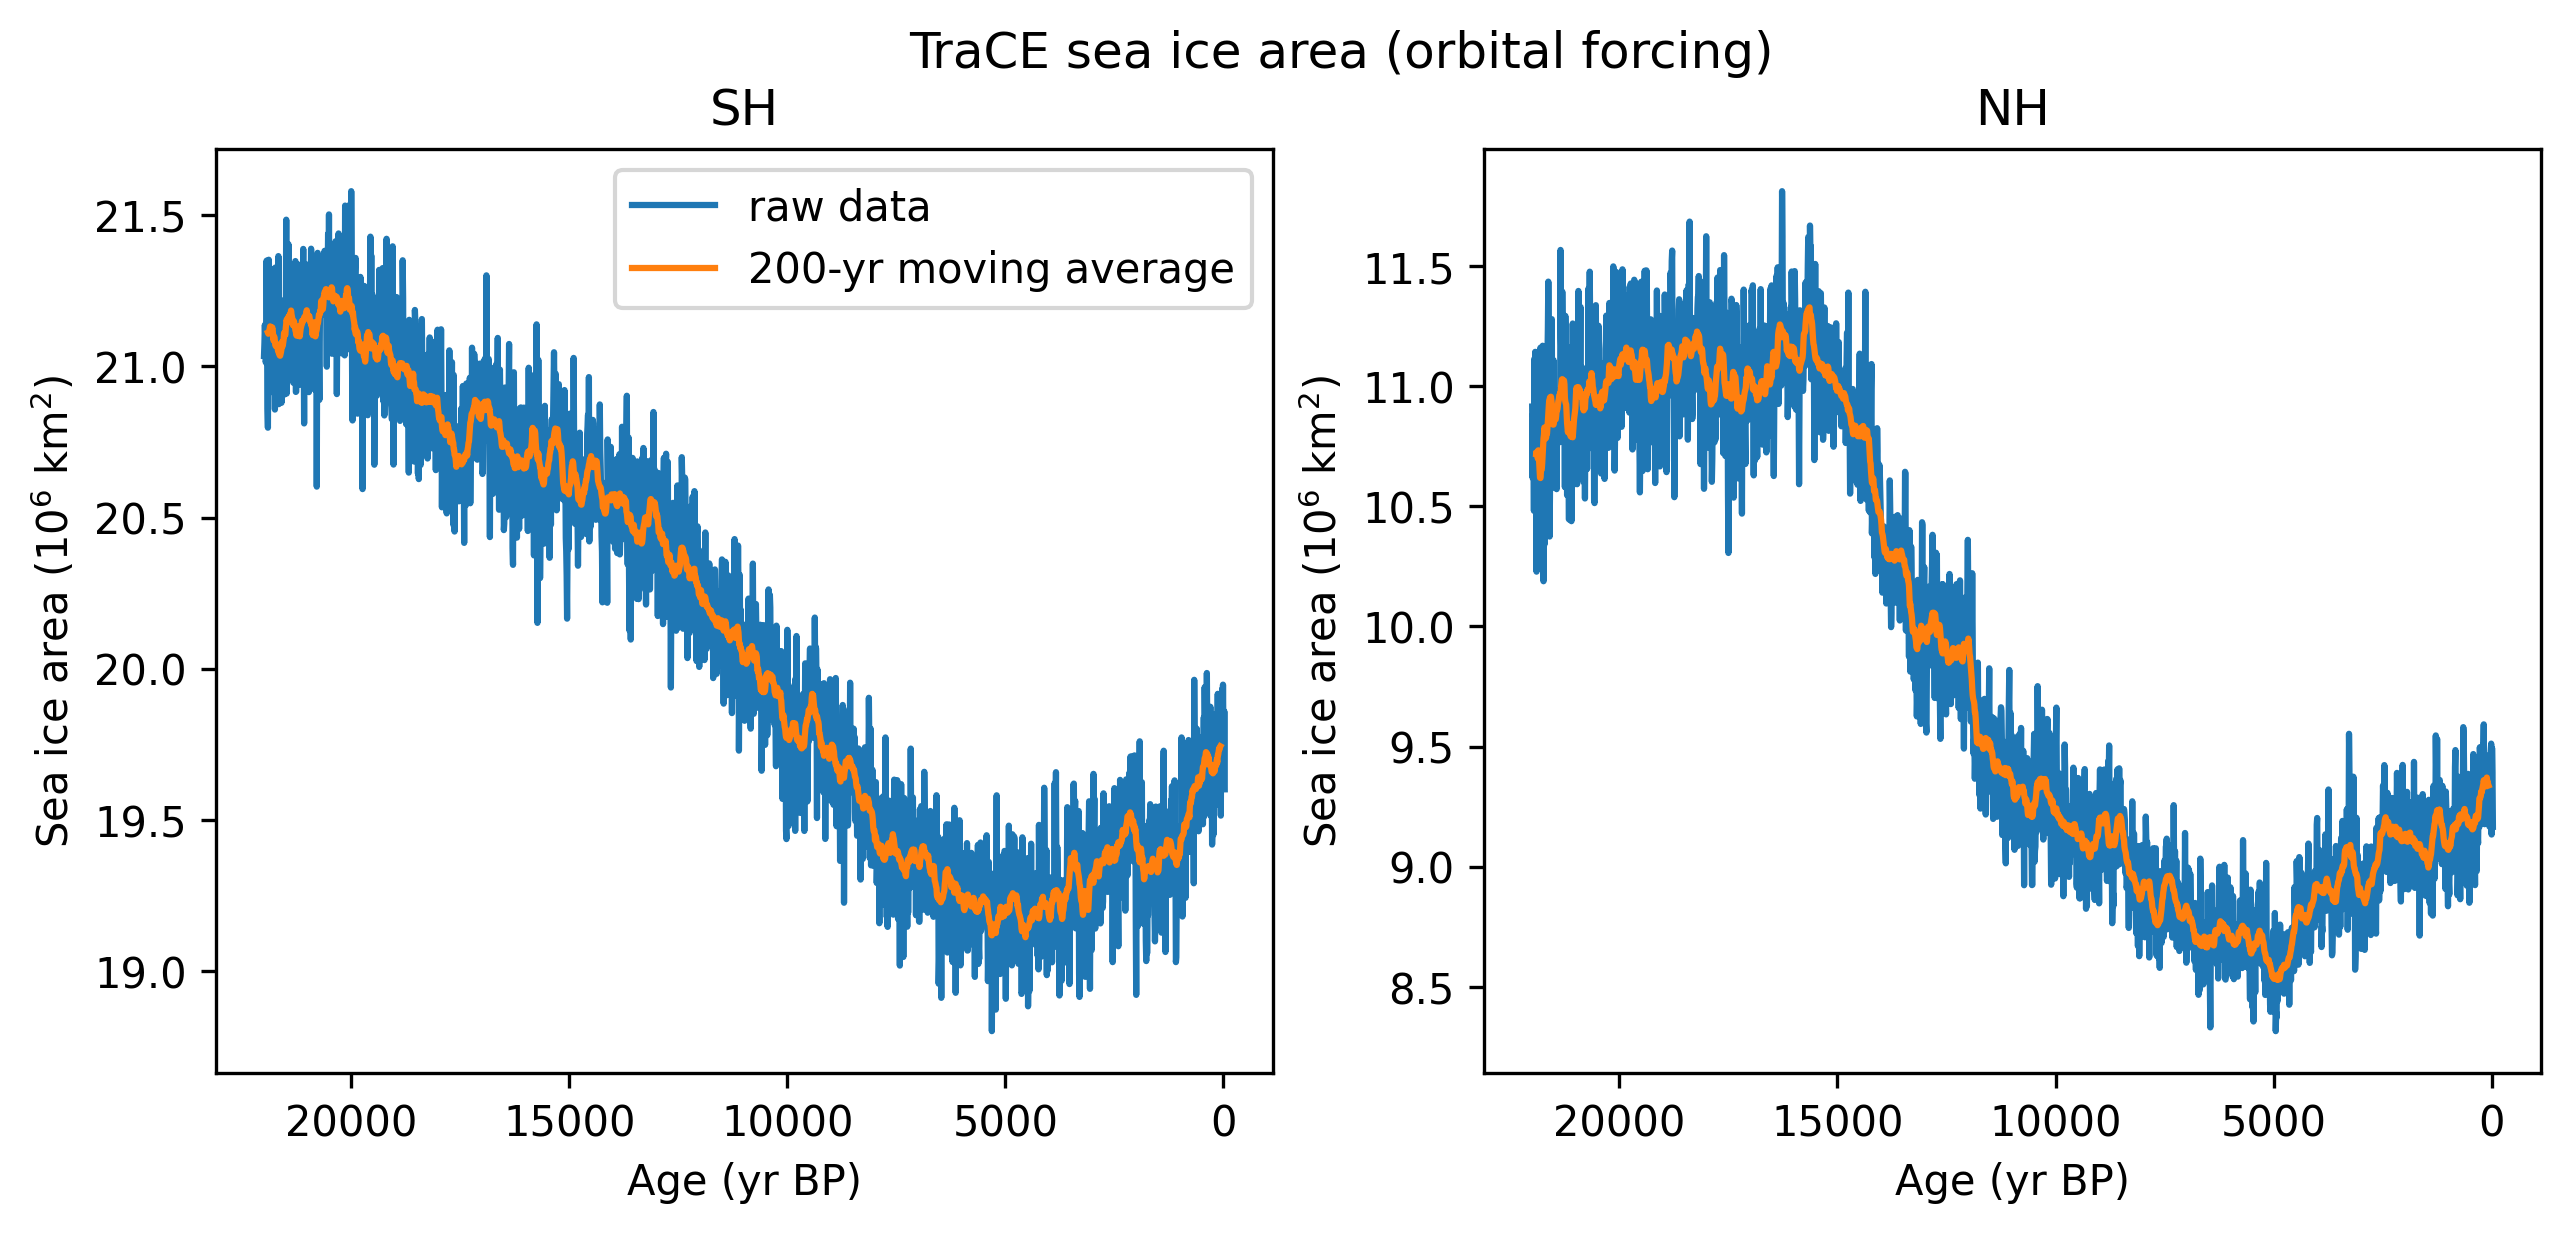

In [28]:
asice_trace_orb_sh = calculate_seaice_area(trace_orb_sic, variable_name='ICEFRAC', lat_min=-90, lat_max=0)
asice_trace_allforcing_sh = calculate_seaice_area(trace_allforcing_sic, variable_name='ICEFRAC', lat_min=-90, lat_max=0)

asice_trace_orb_nh = calculate_seaice_area(trace_orb_sic, variable_name='ICEFRAC', lat_min=0, lat_max=90)
asice_trace_allforcing_nh = calculate_seaice_area(trace_allforcing_sic, variable_name='ICEFRAC', lat_min=0, lat_max=90)

# plot asice_trace_orb_sh and asice_trace_orb_nh side by side

# Smooth the data with a 10-point moving average
import numpy as np
def moving_average(data, points=10):
    return np.convolve(data, np.ones(points)/points, mode='valid')

# plot asice_trace_orb_sh and asice_trace_orb_nh side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4),dpi=300)
fig.suptitle('TraCE sea ice area (orbital forcing)')

smoothing_len=20

# Apply the moving average to your data
smoothed_asice_trace_orb_sh = moving_average(asice_trace_orb_sh[:, 1], smoothing_len)
smoothed_asice_trace_orb_nh = moving_average(asice_trace_orb_nh[:, 1], smoothing_len)

# Since the moving average reduces the length of the data, adjust the x-axis data accordingly
adjusted_x_sh = asice_trace_orb_sh[9:-10, 0]  # Adjusting for a 10-point average
adjusted_x_nh = asice_trace_orb_nh[9:-10, 0]  # Same here

ax1.plot(asice_trace_orb_sh[:, 0], asice_trace_orb_sh[:, 1], label='raw data')
ax1.plot(adjusted_x_sh, smoothed_asice_trace_orb_sh,label='200-yr moving average')
ax1.set_title('SH')
ax1.set_xlabel('Age (yr BP)')
ax1.set_ylabel('Sea ice area ($10^6$ km$^2$)')
ax1.legend()
ax1.invert_xaxis()

ax2.plot(asice_trace_orb_nh[:, 0], asice_trace_orb_nh[:, 1], label='NH')
ax2.plot(adjusted_x_nh, smoothed_asice_trace_orb_nh)
ax2.set_title('NH')
ax2.set_xlabel('Age (yr BP)')
ax2.set_ylabel('Sea ice area ($10^6$ km$^2$)')
ax2.invert_xaxis()

plt.show()


In [6]:
asice_trace_orb_sh

array([[ 2.20000000e+04,  2.10345264e+01],
       [ 2.19899998e+04,  2.10769806e+01],
       [ 2.19799995e+04,  2.11376536e+01],
       ...,
       [-1.00002289e+01,  1.96056082e+01],
       [-2.00004578e+01,  1.98588308e+01],
       [-2.99987793e+01,  1.96005992e+01]])

In [ ]:
# save the asice_trace_orb using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_orb.pickle', 'wb') as f:
    pickle.dump(asice_trace_orb, f)

# save the asice_trace_allforcing using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_allforcing.pickle', 'wb') as f:
    pickle.dump(asice_trace_allforcing, f)

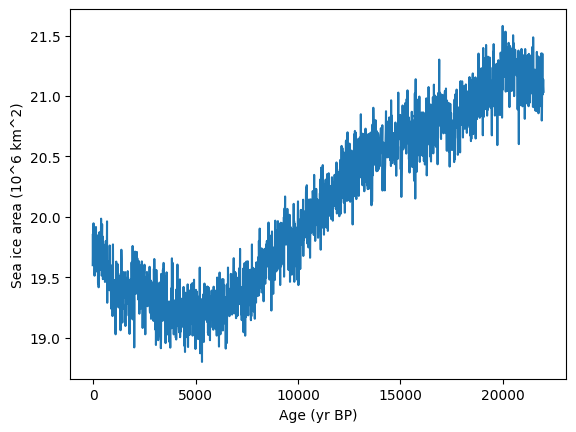

In [39]:
# plot the asice
import matplotlib.pyplot as plt
plt.plot(asice_trace_orb[:,0],asice_trace_orb[:,1])
plt.xlabel('Age (yr BP)')
plt.ylabel('Sea ice area (10^6 km^2)')
plt.show()

# Load all data

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

# load orbital parameters
path='D:/VScode/Last_deglaciation/data_fig3/'
df_ecc=pd.read_csv(path+'df_ecc.csv')
df_pre=pd.read_csv(path+'df_pre.csv')
df_obl=pd.read_csv(path+'df_obl.csv')

# Load summer insolation and intergrated summer insolation of 60°S
inso60s=pd.read_csv('D:/VScode/Last_deglaciation/data_fig3/inso60s.csv')
df_inter_ann=pd.read_csv('D:/VScode/Last_deglaciation/data_fig3/df_inter_ann.csv')



# Load the proxy sea ice data
df_proxy_sea_ice = pd.read_csv('data_fig3/Chadwick et al-2022_Stacks_PCA.csv')
df_proxy_seaice_pc = pd.read_csv('data_fig3/Chadwick et al-2022_Stacks_PCA_pc.csv')

# load the LGMR_sic_area using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/LGMR_sic_area.pickle', 'rb') as f:
    LGMR_sic_area = pickle.load(f)

# # Load LGMR SAT and SIC data
# data_dir = 'D:/VScode/Last_deglaciation/data'
# ds_sat_EOFs_MC = xr.open_dataset(data_dir + '/ds_sat_EOFs_MC.nc')
    
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')

path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'
ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=11000, drop=True)

# read the weighted_avg_sat_mean
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_mean.pickle', 'rb') as f:
    weighted_avg_sat_mean = pickle.load(f)
    
# read the weighted_avg_sat_ens using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_ens.pickle', 'rb') as f:
    weighted_avg_sat_ens = pickle.load(f)



# load TraCE data
path='D:/VScode/Last_deglaciation/data_fig3/'
trace_age=np.load(path+'trace_age.npy')
sat_series_orb=np.load(path+'sat_series_orb.npy')
sat_series_ghg=np.load(path+'sat_series_ghg.npy')
sat_series_allforcing=np.load(path+'sat_series_allforcing.npy')
smoothed_sat_orb=np.load(path+'smoothed_sat_orb.npy')
smoothed_sat_ghg=np.load(path+'smoothed_sat_ghg.npy')
smoothed_sat_allforcing=np.load(path+'smoothed_sat_allforcing.npy')

# read the asice_trace_orb using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_orb.pickle', 'rb') as f:
    asice_trace_orb=pickle.load(f)

# read the asice_trace_allforcing using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_allforcing.pickle', 'rb') as f:
    asice_trace_allforcing=pickle.load(f)


path='D:/VScode/Last_deglaciation/EBM_data/'

# Load the EBM results
# read the df_full_orbital.csv
df_full_orbital_EBM=pd.read_csv(path+'df_full_orbital_EBM.csv')
# read the df_obl.csv
df_obl_EBM=pd.read_csv(path+'df_obl_EBM.csv')
# read the df_pre_EBM.csv
df_pre_EBM=pd.read_csv(path+'df_pre_EBM.csv')
# read the df_GHG_EBM.csv
df_all_forcing_EBM=pd.read_csv(path+'df_all_forcing_EBM.csv')


ebm_list=[df_all_forcing_EBM,df_full_orbital_EBM, df_obl_EBM, df_pre_EBM]



c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


# Plot